In [1]:
%matplotlib inline

# Some usual imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbs
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings(action='ignore')


# Imports in order to be able to use Plotly offline.
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# 1 Data wrangling

In [2]:
coal = pd.read_csv('coal.csv', header = 0)
#coal['Month']=pd.to_datetime(coal['Month'], format=" %b/%d/%Y").dt.date
coal = coal.drop(['Change'], axis = 1)
coal = coal.rename(columns ={'Price' : 'coal_price'})
coal.head()

Month  coal_price
0   8/1/1995       40.88
1   9/1/1995       40.93
2  10/1/1995       40.97
3  11/1/1995       39.59
4  12/1/1995       39.35

In [3]:
crude = pd.read_csv('crude1.csv', header = 0)
crude = crude.drop(['Change'], axis = 1)
crude = crude.rename(columns ={'Price' : 'crude_price'})
x = crude['Month']
crude.head()

Month  crude_price
0   8/1/1995        16.07
1   9/1/1995        16.78
2  10/1/1995        16.12
3  11/1/1995        16.88
4  12/1/1995        17.96

In [4]:
ngas = pd.read_csv('ng.csv', header = 0)
ngas = ngas.drop(['Change'], axis = 1)
ngas = ngas.rename(columns ={'Price' : 'ngas_price'})
ngas.head()

Month  ngas_price
0   8/1/1995        1.56
1   9/1/1995        1.64
2  10/1/1995        1.77
3  11/1/1995        2.04
4  12/1/1995        2.71

In [5]:
gold = pd.read_csv('gold.csv', header = 0)
gold = gold.drop(['Change'], axis = 1)
gold = gold.rename(columns ={'Price' : 'gold_price'})
gold.head()

Month  gold_price
0   8/1/1995      383.67
1   9/1/1995      383.06
2  10/1/1995      383.14
3  11/1/1995      385.31
4  12/1/1995      387.44

In [6]:
iron = pd.read_csv('iron_ore.csv', header = 0)
iron = iron.drop(['Change'], axis = 1)
iron = iron.rename(columns ={'Price' : 'iron_price'})
iron.head()

Month  iron_price
0   8/1/1995       28.38
1   9/1/1995       28.38
2  10/1/1995       28.38
3  11/1/1995       28.38
4  12/1/1995       28.38

In [7]:
aud_usd = pd.read_csv('AUD_USD1.csv', header = 0 )
aud_usd = aud_usd.drop(['Open', 'High','Low', 'Change %'], axis = 1)
aud_usd = aud_usd.rename( columns = {'Price': 'aud_usd_closed',
                                     'Date' : 'Month'})
#aud_usd['Month'] =  pd.to_datetime(aud_usd['Month'], format = "%b %y").dt.date
aud_usd.head(20)

Month  aud_usd_closed
0   Jan 94          0.7087
1   Feb 94          0.7131
2   Mar 94          0.7041
3   Apr 94          0.7152
4   May 94          0.7373
5   Jun 94          0.7274
6   Jul 94          0.7399
7   Aug 94          0.7429
8   Sep 94          0.7399
9   Oct 94          0.7429
10  Nov 94          0.7688
11  Dec 94          0.7752
12  Jan 95          0.7566
13  Feb 95          0.7389
14  Mar 95          0.7340
15  Apr 95          0.7278
16  May 95          0.7179
17  Jun 95          0.7095
18  Jul 95          0.7386
19  Aug 95          0.7513

In [8]:
aud_usd['Month'] = pd.to_datetime(aud_usd['Month'], format = '%b %y')
aud_usd.head(20)


Month  aud_usd_closed
0  1994-01-01          0.7087
1  1994-02-01          0.7131
2  1994-03-01          0.7041
3  1994-04-01          0.7152
4  1994-05-01          0.7373
5  1994-06-01          0.7274
6  1994-07-01          0.7399
7  1994-08-01          0.7429
8  1994-09-01          0.7399
9  1994-10-01          0.7429
10 1994-11-01          0.7688
11 1994-12-01          0.7752
12 1995-01-01          0.7566
13 1995-02-01          0.7389
14 1995-03-01          0.7340
15 1995-04-01          0.7278
16 1995-05-01          0.7179
17 1995-06-01          0.7095
18 1995-07-01          0.7386
19 1995-08-01          0.7513

In [9]:
coal_crude = pd.merge(coal, crude, how = 'outer', on = 'Month')
print(coal_crude.shape[0]- coal_crude.count() )
coal_crude.head()

Month          0
coal_price     0
crude_price    0
dtype: int64


Month  coal_price  crude_price
0   8/1/1995       40.88        16.07
1   9/1/1995       40.93        16.78
2  10/1/1995       40.97        16.12
3  11/1/1995       39.59        16.88
4  12/1/1995       39.35        17.96

In [10]:
plus_ngas = pd.merge(coal_crude,ngas, how = 'outer', on = 'Month')
print(plus_ngas.shape[0]- plus_ngas.count() )
plus_ngas.head()

Month          0
coal_price     0
crude_price    0
ngas_price     0
dtype: int64


Month  coal_price  crude_price  ngas_price
0   8/1/1995       40.88        16.07        1.56
1   9/1/1995       40.93        16.78        1.64
2  10/1/1995       40.97        16.12        1.77
3  11/1/1995       39.59        16.88        2.04
4  12/1/1995       39.35        17.96        2.71

In [11]:
plus_gold = pd.merge(plus_ngas,gold, how = 'outer', on = 'Month')
print(plus_gold.shape[0]- plus_gold.count() )
plus_gold.head(150)

Month          0
coal_price     0
crude_price    0
ngas_price     0
gold_price     0
dtype: int64


Month  coal_price  crude_price  ngas_price  gold_price
0     8/1/1995       40.88        16.07        1.56      383.67
1     9/1/1995       40.93        16.78        1.64      383.06
2    10/1/1995       40.97        16.12        1.77      383.14
3    11/1/1995       39.59        16.88        2.04      385.31
4    12/1/1995       39.35        17.96        2.71      387.44
..         ...         ...          ...         ...         ...
145   9/1/2007       68.44        77.13        6.10      712.65
146  10/1/2007       74.81        82.86        6.80      754.60
147  11/1/2007       84.60        92.53        7.14      806.25
148  12/1/2007       91.00        91.45        7.15      803.20
149   1/1/2008       91.75        91.92        8.00      889.60

[150 rows x 5 columns]

In [12]:
plus_iron = pd.merge(plus_gold,iron, how = 'outer', on = 'Month')
print(plus_iron.shape[0]- plus_iron.count() )
plus_iron.head(20)

Month          0
coal_price     0
crude_price    0
ngas_price     0
gold_price     0
iron_price     0
dtype: int64


Month  coal_price  crude_price  ngas_price  gold_price  iron_price
0    8/1/1995       40.88        16.07        1.56      383.67       28.38
1    9/1/1995       40.93        16.78        1.64      383.06       28.38
2   10/1/1995       40.97        16.12        1.77      383.14       28.38
3   11/1/1995       39.59        16.88        2.04      385.31       28.38
4   12/1/1995       39.35        17.96        2.71      387.44       28.38
5    1/1/1996       39.37        17.94        2.93      399.45       30.00
6    2/1/1996       39.28        17.97        4.40      404.76       30.00
7    3/1/1996       39.01        19.99        2.95      396.21       30.00
8    4/1/1996       39.33        21.01        2.23      392.85       30.00
9    5/1/1996       38.20        19.12        2.24      391.93       30.00
10   6/1/1996       38.20        18.27        2.49      385.27       30.00
11   7/1/1996       38.40        19.61        2.48      383.47       30.00
12   8/1/1996       38.35        20.58        2.03      387.35       30.00
13   9/1/1996       38.10        22.59        1.84      383.14       30.00
14  10/1/1996       37.60        24.18        2.37      381.07       30.00
15  11/1/1996       35.70        22.64        3.03      377.85       30.00
16  12/1/1996       35.35        23.90        3.82      369.00       30.00
17   1/1/1997       35.23        23.47        3.31      355.11       30.15
18   2/1/1997       34.60        20.83        2.22      346.58       30.15
19   3/1/1997       34.50        19.21        1.89      351.81       30.15

In [13]:
plus_iron['Month'] = pd.to_datetime(plus_iron['Month'], format = '%m/%d/%Y')
plus_iron.head()

Month  coal_price  crude_price  ngas_price  gold_price  iron_price
0 1995-08-01       40.88        16.07        1.56      383.67       28.38
1 1995-09-01       40.93        16.78        1.64      383.06       28.38
2 1995-10-01       40.97        16.12        1.77      383.14       28.38
3 1995-11-01       39.59        16.88        2.04      385.31       28.38
4 1995-12-01       39.35        17.96        2.71      387.44       28.38

In [14]:
final = pd.merge(plus_iron,aud_usd, how = 'inner', on = 'Month')
final = final.set_index(keys = 'Month')

final.tail(30)

coal_price  crude_price  ngas_price  gold_price  iron_price  \
Month                                                                     
2017-08-01       98.58        51.37        2.88     1283.04       76.07   
2017-09-01       97.82        55.16        2.96     1314.07       71.53   
2017-10-01       97.11        57.62        2.87     1279.51       61.66   
2017-11-01       96.64        62.57        2.99     1281.90       64.24   
2017-12-01      100.81        64.21        2.76     1264.45       72.25   
2018-01-01      106.45        68.99        3.88     1331.30       76.34   
2018-02-01      105.95        65.42        2.67     1330.73       77.46   
2018-03-01       96.66        66.45        2.69     1324.66       70.35   
2018-04-01       93.69        71.63        2.76     1334.76       65.75   
2018-05-01      105.29        76.65        2.78     1303.45       66.10   
2018-06-01      114.33        75.19        2.94     1281.57       65.04   
2018-07-01      119.57        74.44        2.80     1237.71       64.56   
2018-08-01      117.34        73.13        2.96     1201.71       67.15   
2018-09-01      114.16        78.86        3.00     1198.39       68.44   
2018-10-01      108.73        80.47        3.29     1215.39       73.41   
2018-11-01      100.73        65.17        4.14     1220.65       73.26   
2018-12-01      101.37        56.46        3.95     1250.40       69.15   
2019-01-01       98.56        59.27        3.08     1291.75       76.16   
2019-02-01       95.42        64.13        2.72     1320.07       88.22   
2019-03-01       93.12        66.41        2.94     1300.90       86.47   
2019-04-01       86.77        71.20        2.65     1285.91       93.70   
2019-05-01       82.32        70.53        2.63     1283.70      100.15   
2019-06-01       72.49        63.30        2.40     1359.04      108.94   
2019-07-01       72.08        64.00        2.36     1412.89      120.24   
2019-08-01       65.55        59.25        2.23     1500.41       93.07   
2019-09-01       65.95        62.33        2.58     1510.58       93.08   
2019-10-01       69.20        59.37        2.33     1494.81       88.53   
2019-11-01       66.99        62.74        2.65     1470.79       84.98   
2019-12-01       66.18        65.85        2.24     1479.13       92.65   
2020-01-01       69.66        63.60        2.02     1560.67       95.76   

            aud_usd_closed  
Month                       
2017-08-01          0.7947  
2017-09-01          0.7834  
2017-10-01          0.7657  
2017-11-01          0.7567  
2017-12-01          0.7802  
2018-01-01          0.8055  
2018-02-01          0.7762  
2018-03-01          0.7679  
2018-04-01          0.7533  
2018-05-01          0.7569  
2018-06-01          0.7405  
2018-07-01          0.7429  
2018-08-01          0.7191  
2018-09-01          0.7230  
2018-10-01          0.7074  
2018-11-01          0.7318  
2018-12-01          0.7052  
2019-01-01          0.7273  
2019-02-01          0.7095  
2019-03-01          0.7097  
2019-04-01          0.7049  
2019-05-01          0.6939  
2019-06-01          0.7020  
2019-07-01          0.6845  
2019-08-01          0.6737  
2019-09-01          0.6750  
2019-10-01          0.6894  
2019-11-01          0.6765  
2019-12-01          0.7022  
2020-01-01          0.6692

In [15]:
print(final.shape[0]- final.count() )

coal_price        0
crude_price       0
ngas_price        0
gold_price        0
iron_price        0
aud_usd_closed    0
dtype: int64


In [16]:
final.describe()

coal_price  crude_price  ngas_price   gold_price  iron_price  \
count  294.000000   294.000000  294.000000   294.000000  294.000000   
mean    63.068537    56.148435    4.163163   827.536837   74.036054   
std     32.147555    32.676632    2.176980   482.587651   47.491133   
min     22.250000     9.800000    1.560000   256.080000   27.590000   
25%     34.125000    25.780000    2.650000   352.635000   30.150000   
50%     56.340000    53.655000    3.495000   757.730000   65.000000   
75%     87.415000    75.985000    5.222500  1266.797500   99.417500   
max    180.000000   133.870000   13.520000  1772.140000  197.120000   

       aud_usd_closed  
count      294.000000  
mean         0.766049  
std          0.141629  
min          0.485400  
25%          0.675375  
50%          0.757300  
75%          0.850450  
max          1.099500

In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 1995-08-01 to 2020-01-01
Data columns (total 6 columns):
coal_price        294 non-null float64
crude_price       294 non-null float64
ngas_price        294 non-null float64
gold_price        294 non-null float64
iron_price        294 non-null float64
aud_usd_closed    294 non-null float64
dtypes: float64(6)
memory usage: 16.1 KB


# Exploratory Data Analysis

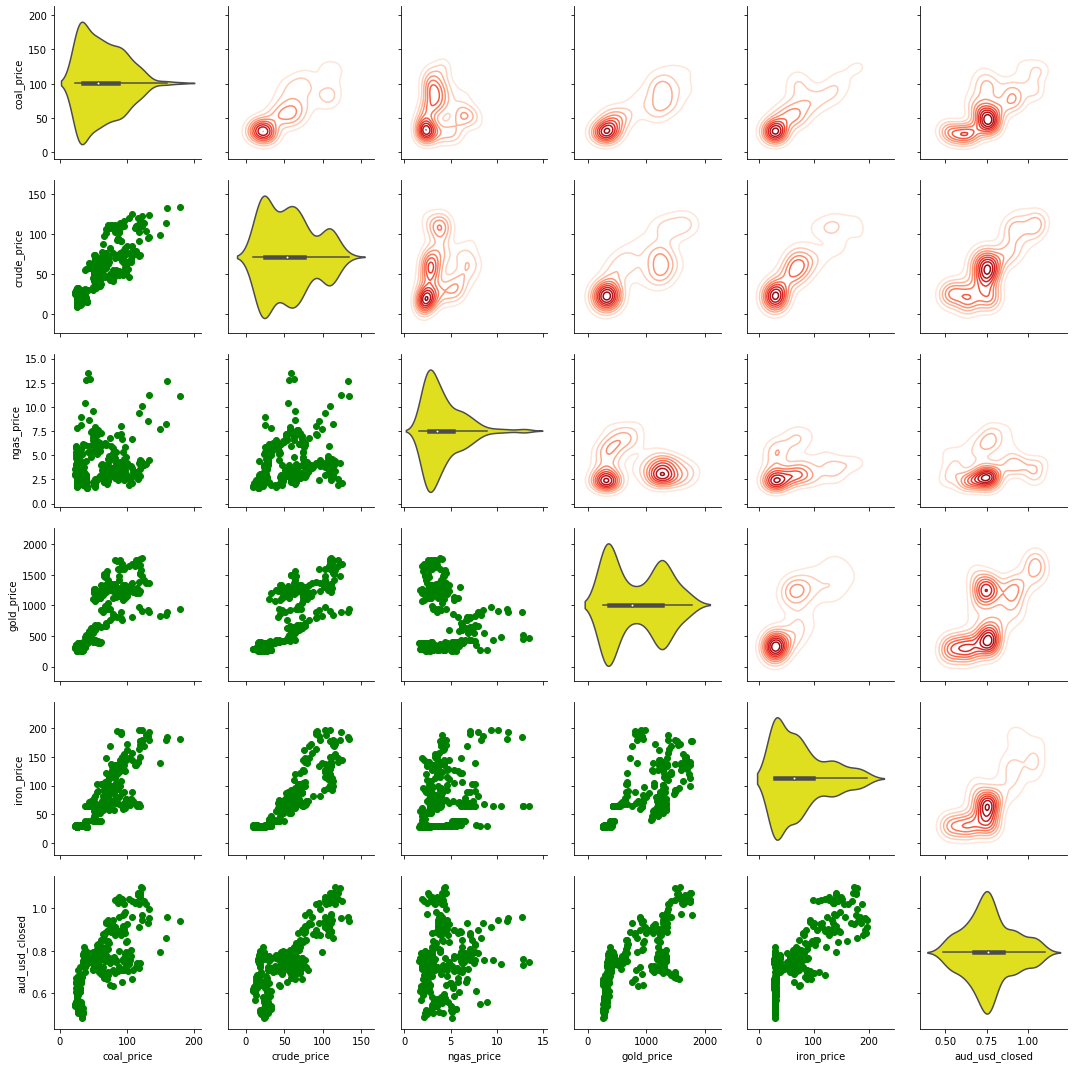

In [18]:
g = sbs.PairGrid(final )
g.map_diag(sbs.violinplot , color = 'Yellow')
g.map_lower(plt.scatter , color = 'green')
g.map_upper(sbs.kdeplot , cmap = 'Reds' ,hue = 'kidder')

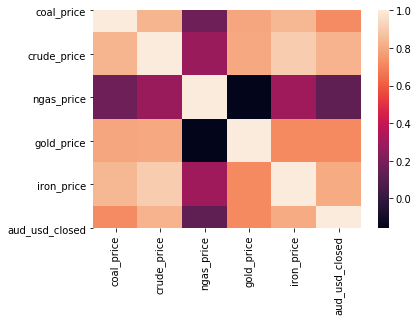

In [19]:
sbs.heatmap(final.corr())

# Autocorrelation and Partial Autocorrelation

-The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

-The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.


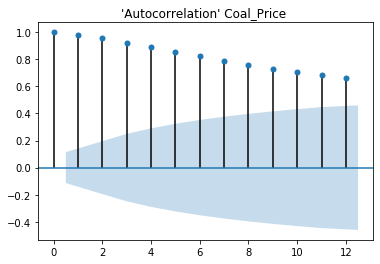

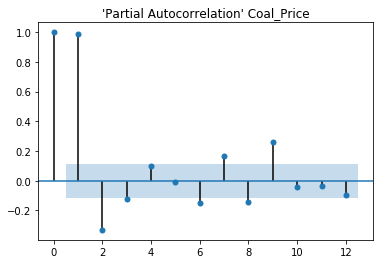

In [20]:
# Autocorrelation 
plot_acf(final["coal_price"],lags=12,title="'Autocorrelation' Coal_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["coal_price"],lags=12, title="'Partial Autocorrelation' Coal_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

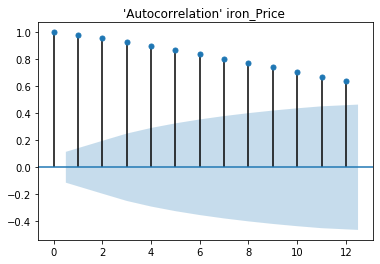

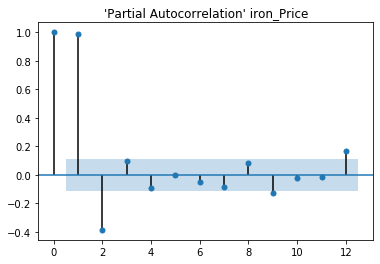

In [21]:
# Autocorrelation 
plot_acf(final["iron_price"],lags=12,title="'Autocorrelation' iron_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["iron_price"],lags=12, title="'Partial Autocorrelation' iron_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

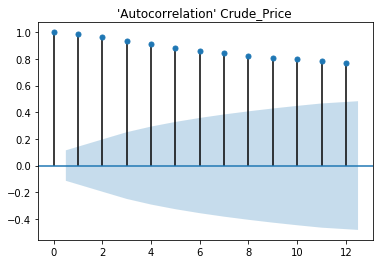

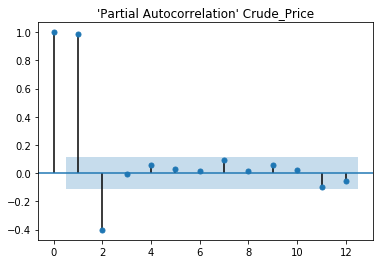

In [22]:
# Autocorrelation 
plot_acf(final["crude_price"],lags=12,title="'Autocorrelation' Crude_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["crude_price"],lags=12, title="'Partial Autocorrelation' Crude_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

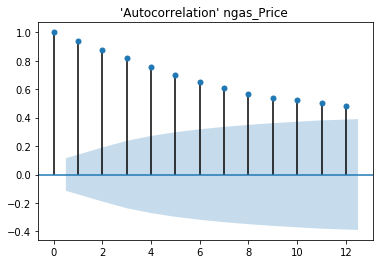

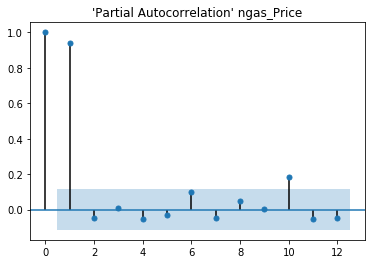

In [23]:
# Autocorrelation 
plot_acf(final["ngas_price"],lags=12,title="'Autocorrelation' ngas_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["ngas_price"],lags=12, title="'Partial Autocorrelation' ngas_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

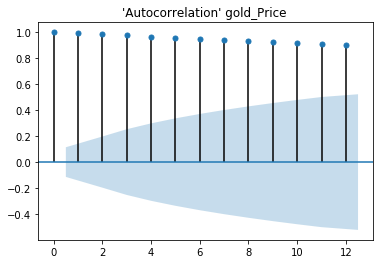

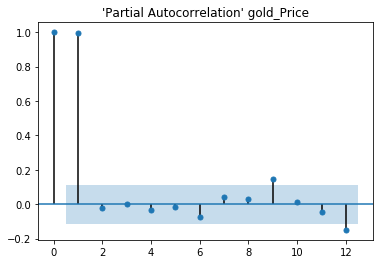

In [24]:
# Autocorrelation 
plot_acf(final["gold_price"],lags=12,title="'Autocorrelation' gold_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["gold_price"],lags=12, title="'Partial Autocorrelation' gold_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

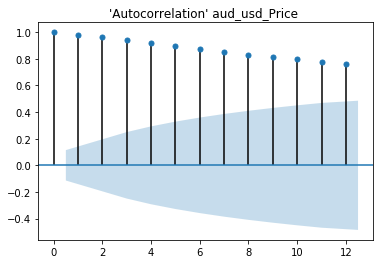

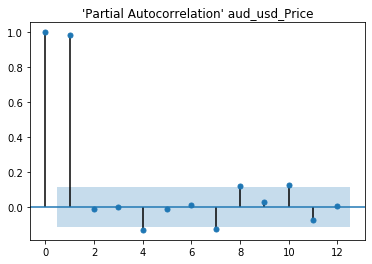

In [25]:
# Autocorrelation 
plot_acf(final["aud_usd_closed"],lags=12,title="'Autocorrelation' aud_usd_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["aud_usd_closed"],lags=12, title="'Partial Autocorrelation' aud_usd_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

# Time series decomposition

a) Trend : Consistent upwards or downwards slope of a time series

b) Seasonality : Clear periodic pattern of a time series

c) Noise : Outliers or missing values

d) Residuals : Shows if a linear regression model is approriate the data


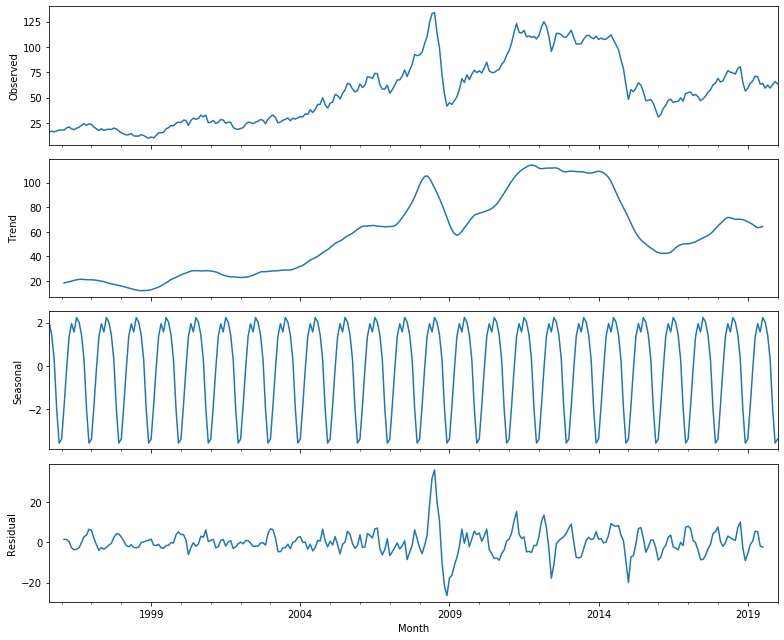

In [26]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_crude_price = sm.tsa.seasonal_decompose( final['crude_price'] , freq = 12 )
figure = decomposed_crude_price.plot()
plt.show()

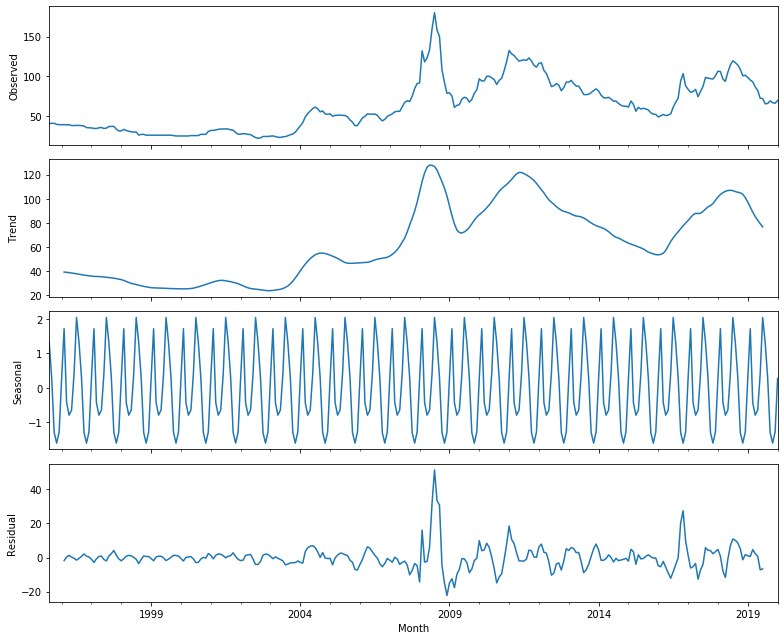

In [27]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_coal_price = sm.tsa.seasonal_decompose( final['coal_price'] , freq = 12 )
figure = decomposed_coal_price.plot()
plt.show()

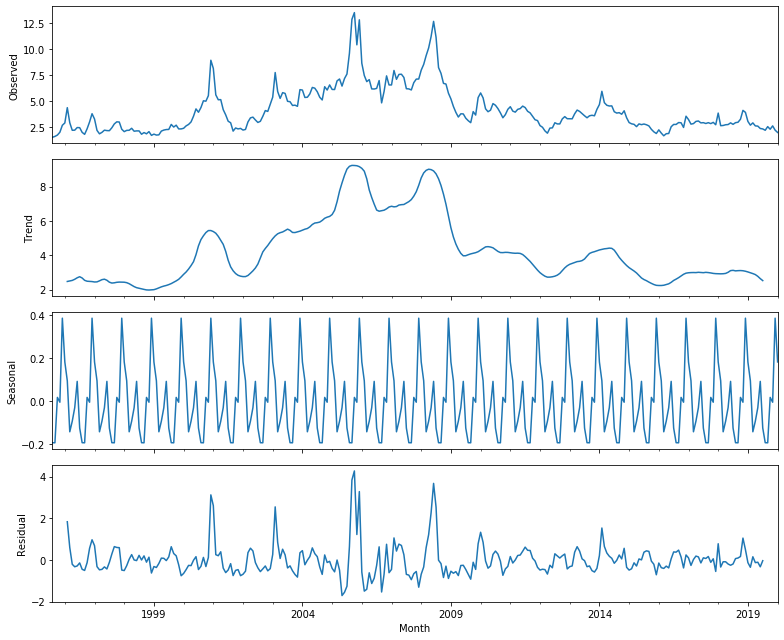

In [28]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_ngas_price = sm.tsa.seasonal_decompose( final['ngas_price'] , freq = 12 )
figure = decomposed_ngas_price.plot()
plt.show()

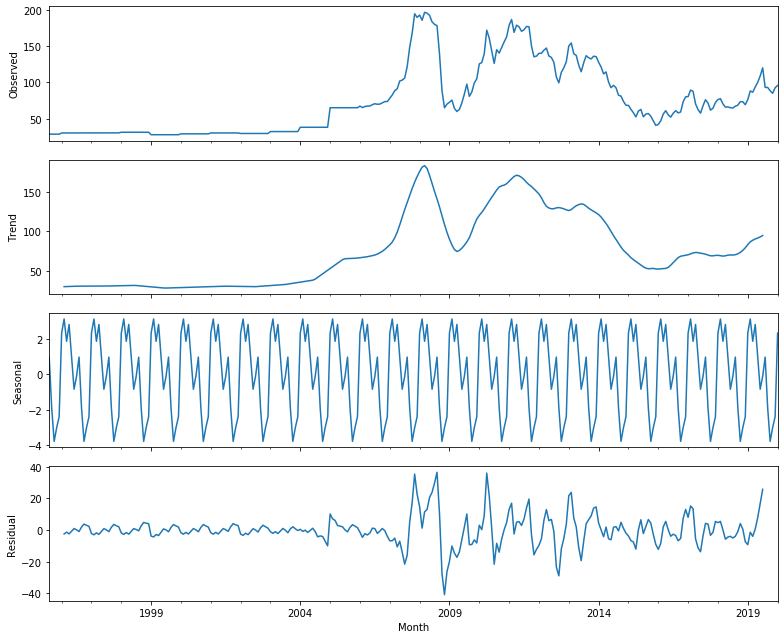

In [29]:
rcParams['figure.figsize'] = 11, 9
decomposed_iron_price = sm.tsa.seasonal_decompose( final['iron_price'] , freq = 12 )
figure = decomposed_iron_price.plot()
plt.show()

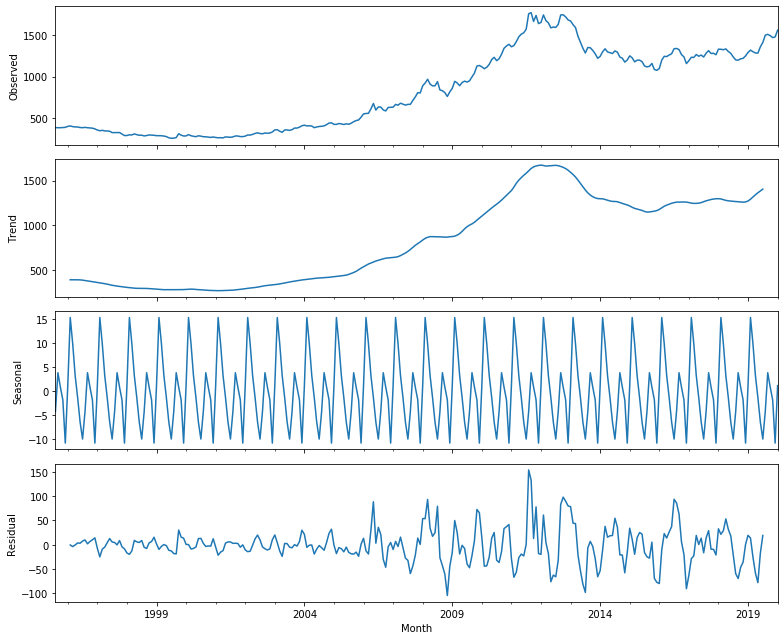

In [30]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_gold_price = sm.tsa.seasonal_decompose( final['gold_price'] , freq = 12 )
figure = decomposed_gold_price.plot()
plt.show()

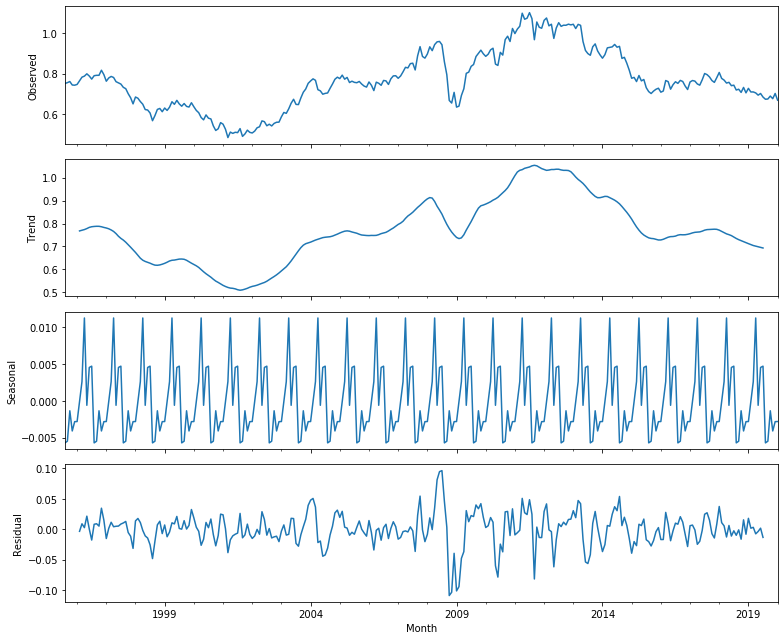

In [31]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_aud_usd_closed = sm.tsa.seasonal_decompose( final['aud_usd_closed'] , freq = 12 )
figure = decomposed_aud_usd_closed.plot()
plt.show()

In [32]:
#In order to have better visualisation, the trace 2-3-4 are modified because have large or small values 
trace1 = go.Scatter(
    x = crude['Month'],
    y = final['crude_price'],
    mode = 'lines',
    name = 'Crude oil')

trace2 = go.Scatter(
    x = crude['Month'],
    y = final['ngas_price']*10,
    mode = 'lines',
    name = 'Natural Gas')

trace3 = go.Scatter(
    x = crude['Month'],
    y = final['gold_price']/10,
    mode = 'lines',
    name = 'Gold')

trace4 = go.Scatter(
    x = crude['Month'],
    y = final['aud_usd_closed']*100,
    mode = 'lines',
    name = 'AUD/USD')

trace5 = go.Scatter(
    x = crude['Month'],
    y = final['coal_price'],
    mode = 'lines',
    name = 'Coal')

trace6 = go.Scatter(
    x = crude['Month'],
    y = final['iron_price'],
    mode = 'lines',
    name = 'iron')


data = [trace1, trace2, trace3, trace4,trace5, trace6]

layout = go.Layout(title = ' Comparisons '
    , barmode = 'group'
    , yaxis=dict(title='Price(USD)')
    , xaxis=dict(title='Year')
    , legend=dict(x=1,y=1)
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)